In [138]:
import pandas as pd

import seaborn as sns

sns.set_context("talk")
import matplotlib.pyplot as plt
import statsmodels

import statsmodels.formula.api as smf
import numpy as np
plt.style.use("ggplot")

In [139]:
data=pd.read_csv('clean_data/final_dataset.csv')

In [140]:
data[['income_census','pop_census']]=np.log(data[['income_census','pop_census']])

# OLS

## Mormon-> bad outcomes

In [141]:
smf.ols('pov_saipe_2010~mormon',data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pov_saipe_2010   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.063
Date:                Sun, 23 Dec 2018   Prob (F-statistic):            0.00455
Time:                        16:19:23   Log-Likelihood:                 4252.1
No. Observations:                3126   AIC:                            -8500.
Df Residuals:                    3124   BIC:                            -8488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1684      0.001    146.877      0.000       0.166       0.171
mormon     -3.685e-05    1.3e-05     -2.839      0.005   -6.23e-05   -1.14e-05
==============================================================================
Omnibus:                      454.828   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              791.463
Skew:                           0.947   Prob(JB):                    1.37e-172
Kurtosis:                       4.578   Cond. No.                         91.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
#Just income
smf.ols('povrate~(income_census)',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                povrate   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     4516.
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:19:23   Log-Likelihood:                 5584.2
No. Observations:                3126   AIC:                        -1.116e+04
Df Residuals:                    3124   BIC:                        -1.115e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.3494      0.033     71.930      0.000       2.285       2.413
income_census    -0.2195      0.003    -67.201      0.000      -0.226      -0.213
==============================================================================
Omnibus:                      339.474   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              651.590
Skew:                           0.706   Prob(JB):                    3.23e-142
Kurtosis:                       4.735   Cond. No.                         455.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
## Controls for income and race
smf.ols('povrate~income_census+nhwrate+blkrate+(pop_census)*mormon+nativerate+asianrate+state_mormon+hisprate',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                povrate   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     744.7
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:19:23   Log-Likelihood:                 6095.0
No. Observations:                3126   AIC:                        -1.217e+04
Df Residuals:                    3115   BIC:                        -1.210e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.1560      0.049     44.232      0.000       2.060       2.252
income_census        -0.2091      0.003    -61.029      0.000      -0.216      -0.202
nhwrate               0.0300      0.037      0.802      0.423      -0.043       0.104
blkrate               0.1400      0.037      3.756      0.000       0.067       0.213
pop_census            0.0042      0.001      8.044      0.000       0.003       0.005
mormon            -3.308e-05   4.89e-05     -0.676      0.499      -0.000    6.29e-05
pop_census:mormon -3.474e-07   4.91e-06     -0.071      0.944   -9.98e-06    9.28e-06
nativerate            0.1666      0.041      4.048      0.000       0.086       0.247
asianrate             0.1834      0.055      3.354      0.001       0.076       0.291
state_mormon         -0.0170      0.018     -0.936      0.349      -0.053       0.019
hisprate              0.0827      0.037      2.212      0.027       0.009       0.156
==============================================================================
Omnibus:                      281.038   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.529
Skew:                           0.562   Prob(JB):                    8.04e-135
Kurtosis:                       4.865   Cond. No.                     1.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
## Fixed effects
smf.ols('povrate~state',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                povrate   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     26.36
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          1.07e-198
Time:                        16:19:23   Log-Likelihood:                 4744.0
No. Observations:                3126   AIC:                            -9386.
Df Residuals:                    3075   BIC:                            -9078.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.1991      0.007     30.472      0.000       0.186       0.212
state[T.Alaska]                  -0.0730      0.013     -5.647      0.000      -0.098      -0.048
state[T.Arizona]                 -0.0087      0.015     -0.569      0.569      -0.039       0.021
state[T.Arkansas]                 0.0009      0.009      0.105      0.916      -0.017       0.019
state[T.California]              -0.0569      0.010     -5.934      0.000      -0.076      -0.038
state[T.Colorado]                -0.0705      0.009     -7.537      0.000      -0.089      -0.052
state[T.Connecticut]             -0.1159      0.020     -5.795      0.000      -0.155      -0.077
state[T.Delaware]                -0.0844      0.032     -2.673      0.008      -0.146      -0.022
state[T.District of Columbia]    -0.0145      0.054     -0.270      0.787      -0.120       0.091
state[T.Florida]                 -0.0391      0.009     -4.235      0.000      -0.057      -0.021
state[T.Georgia]                 -0.0013      0.008     -0.163      0.871      -0.017       0.014
state[T.Hawaii]                  -0.0967      0.028     -3.512      0.000      -0.151      -0.043
state[T.Idaho]                   -0.0538      0.010     -5.186      0.000      -0.074      -0.033
state[T.Illinois]                -0.0695      0.008     -8.250      0.000      -0.086      -0.053
state[T.Indiana]                 -0.0734      0.009     -8.482      0.000      -0.090      -0.056
state[T.Iowa]                    -0.0885      0.008    -10.456      0.000      -0.105      -0.072
state[T.Kansas]                  -0.0761      0.008     -9.099      0.000      -0.092      -0.060
state[T.Kentucky]                 0.0063      0.008      0.770      0.441      -0.010       0.022
state[T.Louisiana]                0.0015      0.009      0.161      0.872      -0.017       0.020
state[T.Maine]                   -0.0627      0.015     -4.213      0.000      -0.092      -0.034
state[T.Maryland]                -0.1061      0.013     -8.338      0.000      -0.131      -0.081
state[T.Massachusetts]           -0.0940      0.016     -5.981      0.000      -0.125      -0.063
state[T.Michigan]                -0.0482      0.009     -5.482      0.000      -0.065      -0.031
state[T.Minnesota]               -0.0901      0.009    -10.367      0.000      -0.107      -0.073
state[T.Mississippi]              0.0448      0.009      5.081      0.000       0.027       0.062
state[T.Missouri]                -0.0370      0.008     -4.503      0.000      -0.053      -0.021
state[T.Montana]                 -0.0477      0.010     -4.924      0.000      -0.067      -0.029
state[T.Nebraska]                -0.0802      0.009     -9.354      0.000      -0.097      -0.063
state[T.Nevada]                  -0.0756     

In [145]:
## Fixed effects
model=smf.ols('povrate~income_census+nhwrate+blkrate+pop_census*mormon+state+nativerate+asianrate+state_mormon+hisprate',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                povrate   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     147.0
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:19:23   Log-Likelihood:                 6284.6
No. Observations:                3126   AIC:                        -1.245e+04
Df Residuals:                    3066   BIC:                        -1.209e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.1775      0.065     33.650      0.000       2.051       2.304
state[T.Alaska]                  -0.0516      0.009     -5.473      0.000      -0.070      -0.033
state[T.Arizona]                 -0.0079      0.010     -0.815      0.415      -0.027       0.011
state[T.Arkansas]                 0.0047      0.006      0.840      0.401      -0.006       0.016
state[T.California]              -0.0044      0.007     -0.679      0.497      -0.017       0.008
state[T.Colorado]                 0.0083      0.006      1.354      0.176      -0.004       0.020
state[T.Connecticut]              0.0055      0.012      0.439      0.661      -0.019       0.030
state[T.Delaware]                -0.0205      0.019     -1.060      0.289      -0.058       0.017
state[T.District of Columbia]     0.0944      0.033      2.850      0.004       0.029       0.159
state[T.Florida]                 -0.0050      0.006     -0.874      0.382      -0.016       0.006
state[T.Georgia]                 -0.0048      0.005     -1.011      0.312      -0.014       0.005
state[T.Hawaii]                  -0.0956      0.024     -3.974      0.000      -0.143      -0.048
state[T.Idaho]                   -0.0080      0.007     -1.205      0.228      -0.021       0.005
state[T.Illinois]                -0.0105      0.005     -1.948      0.051      -0.021    6.65e-05
state[T.Indiana]                 -0.0183      0.006     -3.315      0.001      -0.029      -0.007
state[T.Iowa]                    -0.0205      0.005     -3.759      0.000      -0.031      -0.010
state[T.Kansas]                  -0.0208      0.005     -3.820      0.000      -0.031      -0.010
state[T.Kentucky]                 0.0297      0.005      5.678      0.000       0.019       0.040
state[T.Louisiana]                0.0029      0.006      0.513      0.608      -0.008       0.014
state[T.Maine]                    0.0032      0.009      0.340      0.734      -0.015       0.021
state[T.Maryland]                -0.0168      0.008     -2.111      0.035      -0.032      -0.001
state[T.Massachusetts]            0.0198      0.010      2.007      0.045       0.000       0.039
state[T.Michigan]                -0.0017      0.006     -0.298      0.766      -0.013       0.009
state[T.Minnesota]               -0.0178      0.006     -3.180      0.001      -0.029      -0.007
state[T.Mississippi]              0.0104      0.005      1.905      0.057      -0.000       0.021
state[T.Missouri]                -0.0049      0.005     -0.934      0.350      -0.015       0.005
state[T.Montana]              -3.605e-05      0.006     -0.006      0.995      -0.012       0.012
state[T.Nebraska]                -0.0228      0.006     -4.088      0.000      -0.034      -0.012
state[T.Nevada]                  -0.0038     

Text(0, 0.5, 'Predicted poverty rate')

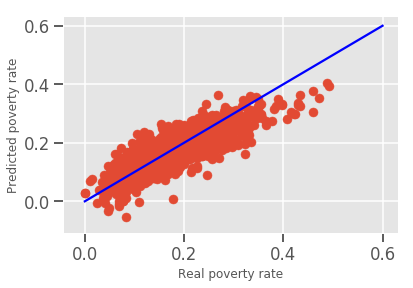

In [146]:
## How good is this?
plt.scatter(data.povrate,model.predict(data))
plt.plot([0,0.6],[0,0.6],color='blue')
plt.xlabel('Real poverty rate')
plt.ylabel('Predicted poverty rate')

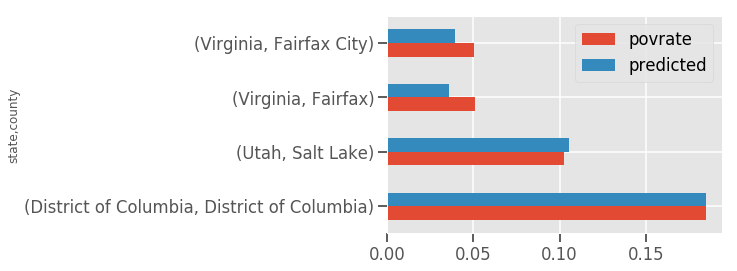

In [147]:
X = data[data.county.str.contains("Salt Lake|Fairfax|District")]
predicted = model.predict(X)
X[["povrate", "state", "county"]].assign(predicted=predicted).set_index(
    ["state", "county"]
).plot.barh()

In [148]:
## Same on saipe
model=smf.ols('pov_saipe_2010~(income_census)+nhwrate+blkrate+(pop_census)*mormon+state+nativerate+asianrate+state_mormon+hisprate',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pov_saipe_2010   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     177.2
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:19:24   Log-Likelihood:                 6567.1
No. Observations:                3126   AIC:                        -1.301e+04
Df Residuals:                    3066   BIC:                        -1.265e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.1275      0.059     35.985      0.000       2.012       2.243
state[T.Alaska]                  -0.0501      0.009     -5.808      0.000      -0.067      -0.033
state[T.Arizona]                  0.0007      0.009      0.081      0.936      -0.017       0.018
state[T.Arkansas]                -0.0040      0.005     -0.794      0.427      -0.014       0.006
state[T.California]               0.0031      0.006      0.529      0.597      -0.009       0.015
state[T.Colorado]                 0.0047      0.006      0.849      0.396      -0.006       0.016
state[T.Connecticut]             -0.0052      0.011     -0.460      0.646      -0.028       0.017
state[T.Delaware]                -0.0310      0.018     -1.754      0.080      -0.066       0.004
state[T.District of Columbia]     0.0694      0.030      2.292      0.022       0.010       0.129
state[T.Florida]                  0.0047      0.005      0.885      0.376      -0.006       0.015
state[T.Georgia]                 -0.0061      0.004     -1.408      0.159      -0.015       0.002
state[T.Hawaii]                  -0.0696      0.022     -3.167      0.002      -0.113      -0.027
state[T.Idaho]                   -0.0083      0.006     -1.373      0.170      -0.020       0.004
state[T.Illinois]                -0.0223      0.005     -4.552      0.000      -0.032      -0.013
state[T.Indiana]                 -0.0224      0.005     -4.452      0.000      -0.032      -0.013
state[T.Iowa]                    -0.0271      0.005     -5.439      0.000      -0.037      -0.017
state[T.Kansas]                  -0.0295      0.005     -5.940      0.000      -0.039      -0.020
state[T.Kentucky]                 0.0191      0.005      4.002      0.000       0.010       0.028
state[T.Louisiana]               -0.0093      0.005     -1.784      0.074      -0.020       0.001
state[T.Maine]                   -0.0074      0.008     -0.870      0.385      -0.024       0.009
state[T.Maryland]                -0.0223      0.007     -3.074      0.002      -0.037      -0.008
state[T.Massachusetts]            0.0112      0.009      1.249      0.212      -0.006       0.029
state[T.Michigan]                -0.0026      0.005     -0.516      0.606      -0.013       0.007
state[T.Minnesota]               -0.0307      0.005     -5.998      0.000      -0.041      -0.021
state[T.Mississippi]             -0.0036      0.005     -0.719      0.472      -0.013       0.006
state[T.Missouri]                -0.0082      0.005     -1.712      0.087      -0.018       0.001
state[T.Montana]                 -0.0040      0.006     -0.709      0.478      -0.015       0.007
state[T.Nebraska]                -0.0314      0.005     -6.152      0.000      -0.041      -0.021
state[T.Nevada]                  -0.0153     

In [149]:
## Same on saipe, no FE
model=smf.ols('pov_saipe_2010~(income_census)+nhwrate+blkrate+(pop_census)*mormon+nativerate+asianrate+state_mormon+hisprate',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pov_saipe_2010   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     862.8
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:19:24   Log-Likelihood:                 6322.3
No. Observations:                3126   AIC:                        -1.262e+04
Df Residuals:                    3115   BIC:                        -1.256e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.1479      0.045     47.389      0.000       2.059       2.237
income_census        -0.2029      0.003    -63.689      0.000      -0.209      -0.197
nhwrate              -0.0134      0.035     -0.385      0.700      -0.082       0.055
blkrate               0.1126      0.035      3.251      0.001       0.045       0.181
pop_census            0.0042      0.000      8.665      0.000       0.003       0.005
mormon            -4.894e-05   4.55e-05     -1.075      0.282      -0.000    4.03e-05
pop_census:mormon  6.929e-07   4.57e-06      0.152      0.879   -8.26e-06    9.65e-06
nativerate            0.1139      0.038      2.978      0.003       0.039       0.189
asianrate             0.0977      0.051      1.923      0.055      -0.002       0.197
state_mormon          0.0018      0.017      0.108      0.914      -0.031       0.035
hisprate              0.0440      0.035      1.266      0.205      -0.024       0.112
==============================================================================
Omnibus:                      337.552   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.830
Skew:                           0.690   Prob(JB):                    7.88e-147
Kurtosis:                       4.806   Cond. No.                     1.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

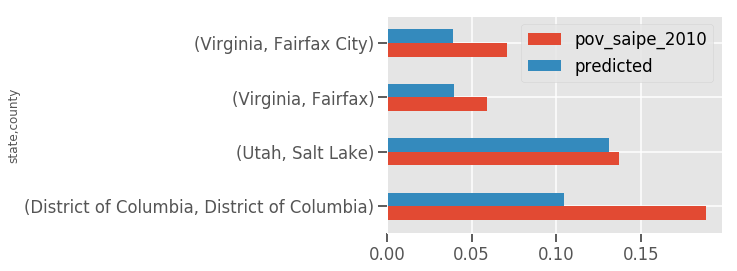

In [150]:
X = data[data.county.str.contains("Salt Lake|Fairfax|District")]
predicted = model.predict(X)
X[["pov_saipe_2010", "state", "county"]].assign(predicted=predicted).set_index(
    ["state", "county"]
).plot.barh()

In [151]:
#Does adding all the other religions help?
## Same on saipe
model=smf.ols('pov_saipe_2010~(income_census)+nhwrate+blkrate+(pop_census)*mormon'
              '+state+nativerate+asianrate+state_mormon+b_protes+catholic+e_protes+m_protes+'
              'south_baptist+o_jew+muslim+hisprate',data=data).fit()
model.summary()
#A bit, Loglikelihood,R2 went up, BIC is a bit petter

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pov_saipe_2010   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     161.5
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:19:24   Log-Likelihood:                 6593.9
No. Observations:                3126   AIC:                        -1.305e+04
Df Residuals:                    3059   BIC:                        -1.265e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.0789      0.060     34.597      0.000       1.961       2.197
state[T.Alaska]                  -0.0485      0.009     -5.509      0.000      -0.066      -0.031
state[T.Arizona]                  0.0011      0.009      0.121      0.904      -0.016       0.019
state[T.Arkansas]                -0.0035      0.005     -0.692      0.489      -0.014       0.006
state[T.California]               0.0056      0.006      0.912      0.362      -0.006       0.018
state[T.Colorado]                 0.0070      0.006      1.190      0.234      -0.005       0.018
state[T.Connecticut]              0.0014      0.012      0.117      0.907      -0.021       0.024
state[T.Delaware]                -0.0243      0.018     -1.374      0.169      -0.059       0.010
state[T.District of Columbia]     0.0749      0.030      2.488      0.013       0.016       0.134
state[T.Florida]                  0.0055      0.005      1.021      0.308      -0.005       0.016
state[T.Georgia]                 -0.0034      0.004     -0.756      0.450      -0.012       0.005
state[T.Hawaii]                  -0.0566      0.022     -2.571      0.010      -0.100      -0.013
state[T.Idaho]                   -0.0074      0.006     -1.181      0.238      -0.020       0.005
state[T.Illinois]                -0.0176      0.005     -3.353      0.001      -0.028      -0.007
state[T.Indiana]                 -0.0184      0.005     -3.377      0.001      -0.029      -0.008
state[T.Iowa]                    -0.0182      0.006     -3.194      0.001      -0.029      -0.007
state[T.Kansas]                  -0.0226      0.005     -4.120      0.000      -0.033      -0.012
state[T.Kentucky]                 0.0216      0.005      4.475      0.000       0.012       0.031
state[T.Louisiana]               -0.0015      0.005     -0.280      0.780      -0.012       0.009
state[T.Maine]                   -0.0052      0.009     -0.602      0.547      -0.022       0.012
state[T.Maryland]                -0.0163      0.008     -2.172      0.030      -0.031      -0.002
state[T.Massachusetts]            0.0193      0.009      2.077      0.038       0.001       0.038
state[T.Michigan]                 0.0016      0.006      0.284      0.777      -0.009       0.012
state[T.Minnesota]               -0.0201      0.006     -3.430      0.001      -0.032      -0.009
state[T.Mississippi]              0.0017      0.005      0.339      0.735      -0.008       0.012
state[T.Missouri]                -0.0046      0.005     -0.927      0.354      -0.014       0.005
state[T.Montana]                  0.0007      0.006      0.113      0.910      -0.011       0.013
state[T.Nebraska]                -0.0231      0.006     -4.032      0.000      -0.034      -0.012
state[T.Nevada]                  -0.0154     

## Conclusion
For fixed effects model:
* Mormon coefficient for pov_saipe_2010=-5.087e-05 (p=0.282)
* Mormon coefficient for state_mormon=-0.0002	(p=0.974)

If mormonism falls from 1000 to 0, that means 1000\*0.5e-5=0.005 increment in the poverty rate (e.g. from 0.2 to 0.2005). e.g. for Salt Lake City (baseline=0.137), that would mean an increase of 3.64% (Assuming the model is right) 

# Predicting with XGBoost
XGBoost is a library that enables one to train gradient boosted trees, which should better capture odd nonlinearities present in the data.

It has many parameters to tune, so I leave it in the bands of BayesSearchCV to find the optimal ones. It will try a combination of parameters, run a 5-fold CV to estimate accuracy, and then make a guess about what the best combinations of parameters is, up to 100 times.

In [152]:
import xgboost as xgb

X_plain = data[
    [
        "state",
        "mormon",
        "pop_census",
        "income_census",
        "nhwrate",
        "blkrate",
        "nativerate",
        "asianrate",
        "state_mormon",
  
        "b_protes",
        "catholic",
        "e_protes",
        "m_protes",
        "south_baptist",
        "o_jew",
        "muslim",
        "hisprate"
    ]
]
y = data.pov_saipe_2010
st_dummie = pd.get_dummies(data.state)
X = pd.concat([X_plain.drop(columns="state"), st_dummie], axis=1)

In [167]:
# https://www.kaggle.com/nikitpatel/random-grid-bayes-search-cv-for-xgb
from skopt import BayesSearchCV
from sklearn.model_selection import KFold

ITERATIONS = 40


def get_bayes_tuner(estimator, search_space):
    return BayesSearchCV(
        estimator=estimator,
        search_spaces=search_space,
        cv=KFold(n_splits=20, shuffle=True, random_state=42),
        n_jobs=6,
        n_iter=ITERATIONS,
        verbose=0,
        refit=True,
        random_state=42,
    )

In [168]:
result = get_bayes_tuner(xgb.XGBRegressor(n_jobs=2, silent=1),{
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 12),       
        'subsample': (0.5, 1.0, 'uniform'),
        'colsample_bytree': (0.3, 1.0, 'uniform'),
        'colsample_bylevel': (0.5, 1.0, 'uniform'),
        'n_estimators': (50, 100,120)
    }).fit(
    X, y
)

In [169]:
# True score
result.best_score_

0.8010333745311263

In [170]:
#Fake score because we are training on the whole set
result.score(X,y)

0.93799282939998

[<matplotlib.lines.Line2D at 0x7f7f8c6f2860>]

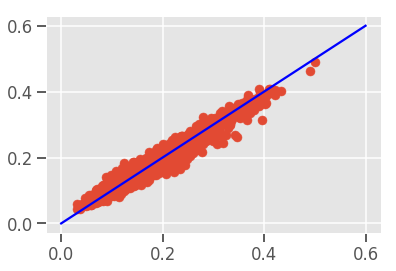

In [171]:
plt.scatter(y,result.predict(X))
plt.plot([0,0.6],[0,0.6],color='blue')

In [172]:
result.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree',
       colsample_bylevel=0.9096240850238511,
       colsample_bytree=0.8716514021732396, gamma=0,
       learning_rate=0.09872984559057663, max_delta_step=0, max_depth=7,
       min_child_weight=10, missing=None, n_estimators=120, n_jobs=2,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.6968307019647485)

In [173]:
xgb_opt=xgb.XGBRegressor(base_score=0.5, booster='gbtree',
       colsample_bylevel=0.9096240850238511,
       colsample_bytree=0.8716514021732396, gamma=0,
       learning_rate=0.09872984559057663, max_delta_step=0, max_depth=7,
       min_child_weight=10, missing=None, n_estimators=120, n_jobs=2,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.6968307019647485)
xgb_opt.fit(X,y)
xgb_opt.score(X,y)

0.93799282939998

<Figure size 864x1008 with 0 Axes>

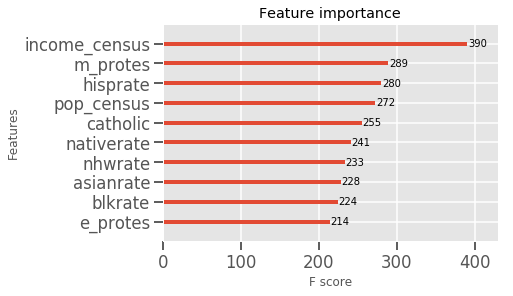

In [174]:
plt.figure(figsize=(12,14))
xgb.plot_importance(xgb_opt,max_num_features=10)

These feature importances are fake news because of multicollinearity issues (religiosity is collinear with the religion variables, for example), so we turn to SHAP to see what features drive this model.

[SHAP](https://arxiv.org/pdf/1705.07874.pdf) produces a score for each pair of (feature,sample), indicating how much that feature contributed in that particular case. In effect SHAP is solving a credit assignment problem.

Unlike with the coefficients in OLS, here we have scores per pair of features, which make it more important to visualise what is going on on a case by case basis to see if trends emerge

In [176]:
import shap
shap.initjs()

In [177]:
explainer=shap.TreeExplainer(xgb_opt)
shaps=explainer.shap_values(X)

In [178]:
#Model prediction: What happens if

'Position is 2778'

,Baseline,Predicted,NM County,NM State,NM State&County,No Religion
0,0.137,0.136022,0.144755,0.138757,0.142954,0.09559


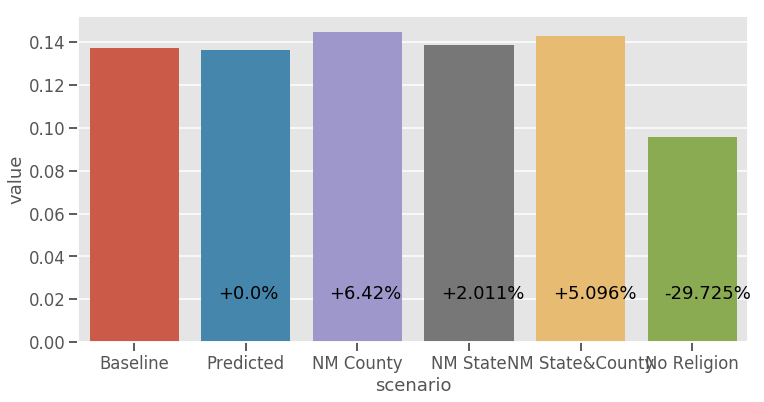

In [179]:
def plot_mormon_change(county, state):
    sns.set_context("talk")
    plt.figure(figsize=(12, 6))
    data_salt = data.query("county==@county and state==@state")
    salt = X.iloc[data_salt.index[0]].to_frame().T
    display(f'Position is {data_salt.index[0]}')
    baseline = data_salt.pov_saipe_2010.values[0]
    predicted = xgb_opt.predict(salt)
    # No mormons
    nomormons = salt.assign(mormon=0)
    # No mormons in the state
    nostatemormon = salt.assign(state_mormon=0)
    # Both
    both = salt.assign(mormon=0, state_mormon=0)
    # No religion
    noreligion= salt.assign(
        mormon=0,
        state_mormon=0,
        muslim=0,
        catholic=0,
        e_protes=0,
        b_protes=0,
        m_protes=0,
        south_baptist=0,
        o_jew=0,
    )
    predicted_nomorm = xgb_opt.predict(nomormons)
    predicted_both = xgb_opt.predict(both)
    predicted_nostatemormon = xgb_opt.predict(nostatemormon)
    predicted_norel = xgb_opt.predict(noreligion)
    k = pd.DataFrame(
        {
            "Baseline": baseline,
            "Predicted": predicted,
            "NM County": predicted_nomorm,
            "NM State": predicted_nostatemormon,
            "NM State&County": predicted_both,
            "No Religion": predicted_norel,
        }
    )
    display(k)
    sns.barplot(x="scenario", y="value", data=k.melt(var_name="scenario"))

    for pos, col in enumerate(k):
        if col == "Baseline":
            continue
        delta_predicted = np.round(
            100 * (k.at[0, col] - k.at[0, "Predicted"]) / k.at[0, "Predicted"], 3
        )
        string = f"{str(delta_predicted)}%"
        if "-" not in string:
            string = "+" + string
        plt.annotate(string, xy=(pos - 0.25, 0.02))


plot_mormon_change("Salt Lake", "Utah")

'Position is 217'

,Baseline,Predicted,NM County,NM State,NM State&County,No Religion
0,0.128,0.115998,0.11947,0.113649,0.115606,0.077365


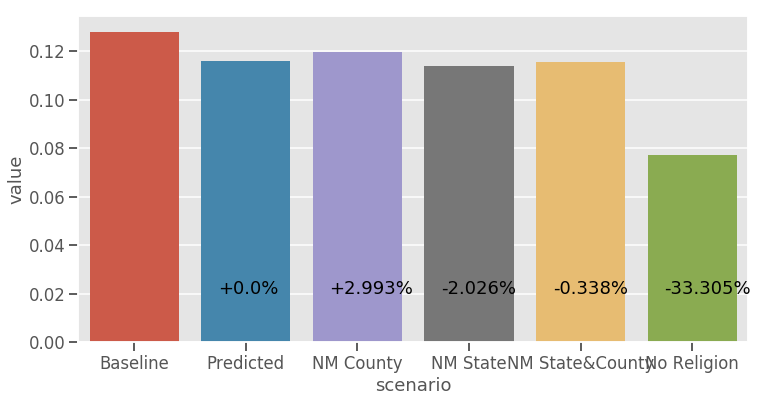

In [180]:
plot_mormon_change('San Francisco',"California")

In [181]:
#Salt Lake City
shap.force_plot(explainer.expected_value,shaps[2778,:],X.iloc[2778,:])

In [182]:
#San Francisco
shap.force_plot(explainer.expected_value,shaps[217,:],X.iloc[217,:])

In [183]:
data.sort_values('povrate')

,state,county,povrate,pop_census,income_census,nhwrate,blkrate,asianrate,nativerate,hisprate,...,religiosity,pov_saipe_2010,pov_saipe_2017,mortality_alcohol,mortality_drug_us,mortality_self_ha,mortality_interpe,mortality,outcomes,state_mormon
2641,Texas,King,0.000000,5.389072,10.584334,0.817352,0.000000,0.036530,0.000000,0.100457,...,0.898601,0.125,0.139,1.39,3.72,11.69,1.82,0.053739,0.063901,0.011772
2657,Texas,Loving,0.000000,3.713572,10.650649,0.780488,0.000000,0.000000,0.219512,0.000000,...,0.073171,0.145,0.097,2.46,8.23,18.01,3.29,0.140031,0.146405,0.011772
2775,Utah,Morgan,0.010727,9.099297,10.097243,0.963164,0.000000,0.003218,0.000777,0.021414,...,0.896293,0.054,0.041,3.10,7.49,16.08,1.83,0.121104,0.088374,0.689507
2624,Texas,Irion,0.014943,7.422374,10.369012,0.738793,0.041841,0.002989,0.000000,0.216378,...,0.756098,0.096,0.093,1.24,5.38,13.41,2.39,0.075169,0.070492,0.011772
1797,New Mexico,Los Alamos,0.024253,9.796848,10.809203,0.773202,0.003317,0.053839,0.001603,0.141894,...,0.673705,0.032,0.037,3.29,7.64,15.15,2.56,0.122856,0.082199,0.034348
256,Colorado,Douglas,0.028557,12.514395,10.655328,0.856451,0.011286,0.036055,0.001920,0.072747,...,0.350369,0.035,0.032,1.55,4.40,13.25,1.74,0.068727,0.036921,0.028355
2856,Virginia,Loudoun,0.031515,12.577384,10.722298,0.643189,0.069675,0.139868,0.001018,0.117074,...,0.383659,0.037,0.030,1.22,2.32,9.37,1.52,0.027551,0.003835,0.011166
258,Colorado,Elbert,0.034949,10.029680,10.456855,0.907670,0.007485,0.006428,0.006560,0.054905,...,0.150178,0.065,0.049,1.99,5.70,17.98,1.99,0.113519,0.086227,0.028355
1780,New Jersey,Somerset,0.035510,12.664740,10.759327,0.644024,0.083408,0.133294,0.000683,0.122826,...,0.485200,0.052,0.053,2.20,5.51,6.90,1.95,0.040335,0.023628,0.003594
265,Colorado,Hinsdale,0.036810,6.192362,10.675746,0.924335,0.000000,0.000000,0.000000,0.073620,...,0.332147,0.094,0.086,2.41,3.47,18.61,2.35,0.114899,0.099356,0.028355


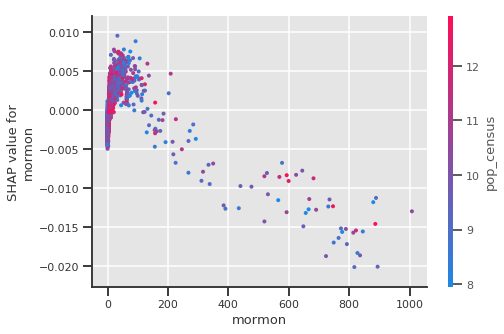

In [184]:
shap.dependence_plot("mormon", shaps,X)

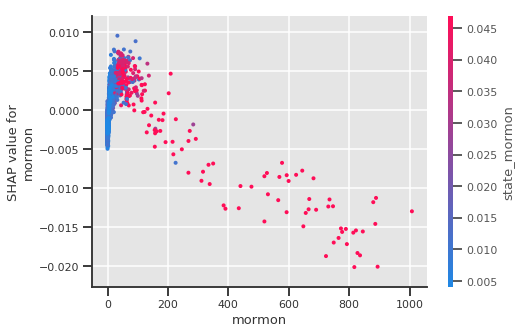

In [186]:
#All the mormons driving the correlation are in Mormon states
shap.dependence_plot("mormon", shaps,X,interaction_index=7)

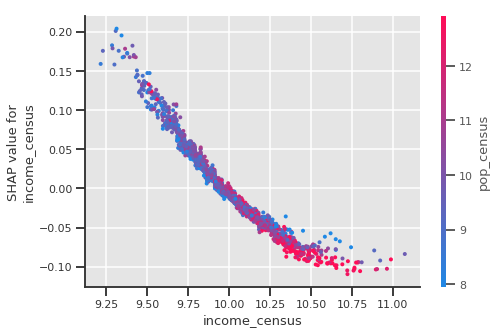

In [187]:
shap.dependence_plot("income_census", shaps, X)

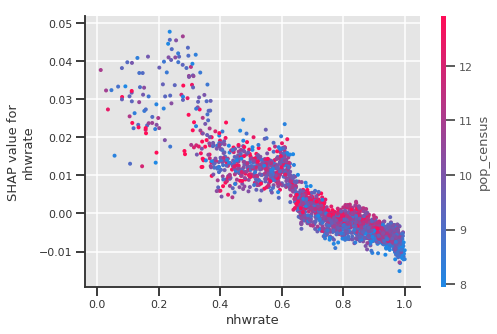

In [188]:
shap.dependence_plot("nhwrate", shaps, X)

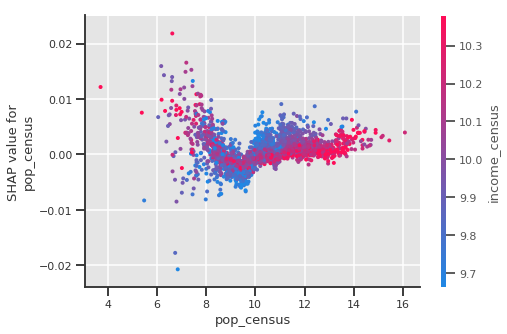

In [189]:
shap.dependence_plot("pop_census", shaps, X)

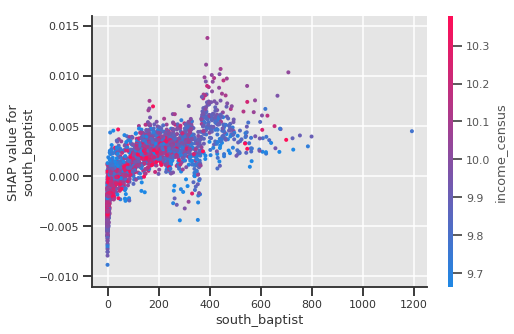

In [190]:
shap.dependence_plot("south_baptist", shaps, X)

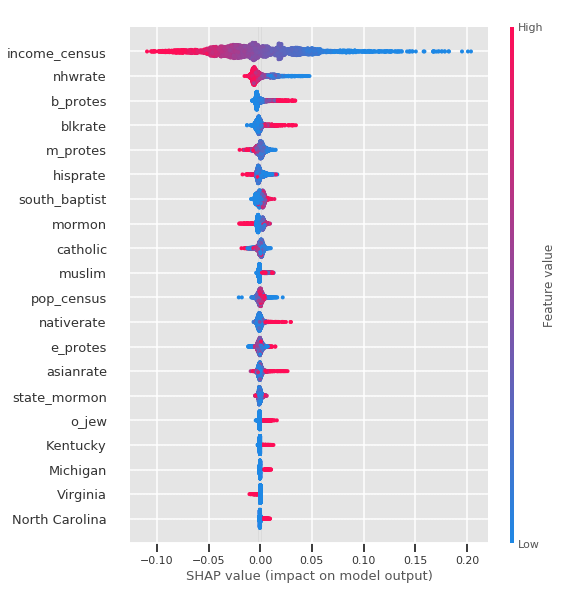

In [191]:
# This plot measures the impact of a variable on poverty. Each point is a particular county.
# The y-size of each row represents the density of points at that particular point
# High SHAP values mean in that case the variable in that case contributed to a higher poverty rate
# The sense in which it contributed can be glanced from the colorbar
# For example, the blue points in income_census mean that when income was low, the SHAP value was high (higher poverty)
# Positive values mean that in that part
shap.summary_plot(shaps,X)

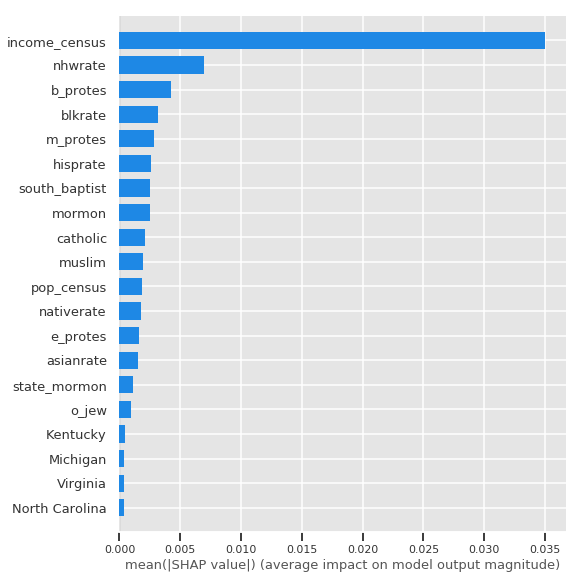

In [192]:
shap.summary_plot(shaps, X, plot_type="bar")

In [193]:
# Nearest neightbours to Salt Lake City
data_salt = data.query('county=="Salt Lake"')
salt = data_salt.index[0]


def normal(col):
    return (col - col.mean()) / col.std()


normalized = data.loc[
    :,
    [
        i
        for i in data.columns
        if (data[i].dtype == float)
        #To avoid double counting
        # We ignore mormon to deliberately pull non-mormon examples

        and i not in ["state_mormon", "mormon", "religiosity","pop2010","outcomes"]
    ],
].apply(normal)
from sklearn.neighbors import NearestNeighbors

neig = NearestNeighbors()
neig.fit(normalized)
data.iloc[
    neig.kneighbors(normalized.loc[salt, :].values.reshape(1, -1), 10)[1].squeeze(), :
][
    [
        "state",
        "county",
        "povrate",
        "pov_saipe_2010",

        "mormon",
        "state_mormon",
        "mortality_alcohol",
        "mortality_interpe",
        "mortality_self_ha",
        "mortality_drug_us",
        "mortality",
        "outcomes",
        "pop2010",
        "b_protes",
        "catholic",
        "e_protes",
        "m_protes",
        "south_baptist",
        "o_jew",
        "muslim",
    ]
]

,state,county,povrate,pov_saipe_2010,mormon,state_mormon,mortality_alcohol,mortality_interpe,mortality_self_ha,mortality_drug_us,mortality,outcomes,pop2010,b_protes,catholic,e_protes,m_protes,south_baptist,o_jew,muslim
2778,Utah,Salt Lake,0.102685,0.137,593.250000,0.689507,5.47,3.67,25.39,9.98,0.236136,0.220286,1029655.0,1.260000,81.908889,26.710000,12.420000,4.888889,0.10,4.41
2789,Utah,Weber,0.114729,0.137,599.600000,0.689507,4.43,3.33,27.59,11.27,0.242211,0.224776,231236.0,3.840000,81.878889,46.538889,11.938889,5.110000,0.00,0.43
259,Colorado,El Paso,0.110709,0.134,29.890000,0.028355,6.07,4.93,20.12,9.54,0.214503,0.205201,622263.0,4.320000,84.060000,153.120000,54.148889,26.050000,0.00,0.48
1750,Nevada,Washoe,0.125972,0.153,46.118889,0.064764,6.10,5.44,23.64,16.34,0.273583,0.265028,421407.0,2.440000,143.590000,77.260000,19.440000,10.820000,0.14,0.73
2209,Oregon,Jackson,0.139909,0.157,41.688889,0.038644,3.94,3.42,22.12,9.53,0.192165,0.193552,203206.0,0.000000,81.518889,127.408889,25.850000,5.460000,0.30,0.00
2203,Oregon,Deschutes,0.104874,0.148,32.798889,0.038644,4.75,2.77,20.38,7.69,0.177047,0.175259,157733.0,0.000000,73.810000,109.858889,31.198889,3.650000,0.00,0.00
300,Colorado,Weld,0.139326,0.143,19.030000,0.028355,6.21,4.10,17.73,10.06,0.196752,0.193601,252825.0,0.000000,135.030000,92.818889,38.798889,9.410000,0.00,1.22
2787,Utah,Washington,0.113457,0.147,681.980000,0.689507,2.28,2.84,25.86,8.66,0.189565,0.184830,138115.0,4.758889,42.320000,16.980000,9.348889,3.318889,0.00,0.00
2942,Washington,Clark,0.108599,0.127,48.880000,0.039668,4.02,2.90,16.76,9.33,0.152537,0.148411,425363.0,0.890000,63.210000,137.330000,29.698889,8.390000,0.14,0.72
2214,Oregon,Lane,0.166988,0.191,36.070000,0.038644,5.21,3.18,19.97,9.89,0.192786,0.208632,351715.0,0.840000,61.938889,96.810000,34.350000,9.210000,0.71,0.88


'Position is 2789'

,Baseline,Predicted,NM County,NM State,NM State&County,No Religion
0,0.137,0.13783,0.147813,0.140942,0.145791,0.11558


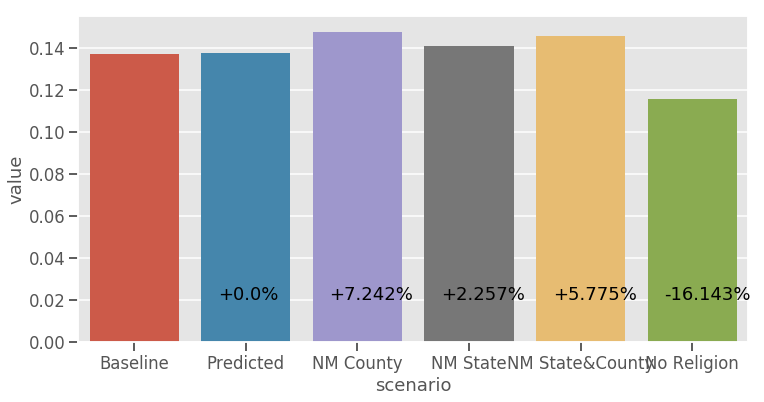

In [194]:
plot_mormon_change("Weber", "Utah")

'Position is 259'

,Baseline,Predicted,NM County,NM State,NM State&County,No Religion
0,0.134,0.133227,0.126493,0.129288,0.121242,0.100616


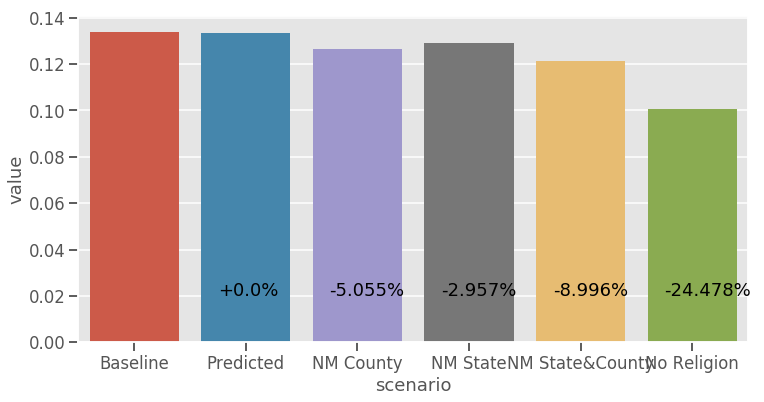

In [195]:
plot_mormon_change("El Paso", "Colorado")

,Baseline,min(9.21),x0.5,x0.95,Predicted,x1.05,x1.5,max(11.07)
0,0.137,0.157436,0.296053,0.152456,0.136022,0.132525,0.072157,0.126215


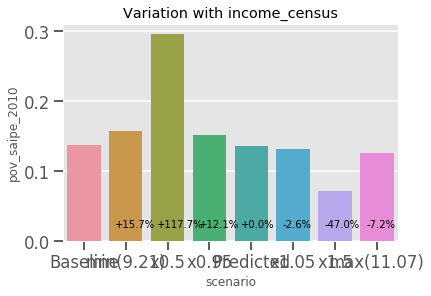

In [200]:
def plot_variable_change(county, state, variable, ax=None):
    data_salt = data.query("county==@county and state==@state")
    salt = X.iloc[data_salt.index[0]].to_frame().T
    # display(f'Position is {data_salt.index[0]}')
    baseline = data_salt.pov_saipe_2010.values[0]
    predicted = xgb_opt.predict(salt)
    baseline_var = data_salt[variable].values[0]

    varmin = data[variable].min()
    varmax = data[variable].max()
    income_multiples = {
        f"min({round(varmin,2)})": varmin / baseline_var,
        "x0.5": 0.5,
        "x0.95": 0.95,
        "Predicted": 1.0,
        "x1.05": 1.05,
        "x1.5": 1.5,
        f"max({round(varmax,2)})": varmax / baseline_var,
    }
    scenarios = {}

    def multiplier_exp(df, variable, i):
        if variable in ["income_census", "pop_census"]:
            return np.log(np.exp(df[variable]) * i)
        else:
            return df[variable] * i

    for name, i in income_multiples.items():
        replacements = {variable: multiplier_exp(salt, variable, i)}
        new_var = multiplier_exp(salt, variable, i)
        original_var = baseline_var
        diff = new_var - original_var
        if variable == "nhwrate":
            # Reduce the coefficients of other races (blkrate,nativerate,asianrate)
            replacements["blkrate"] = np.clip(salt.blkrate - diff, a_min=0, a_max=1)
        elif variable == "blkrate":
            replacements["nhwrate"] = np.clip(salt.nhwrate - diff, a_min=0, a_max=1)

        scenarios[name] = xgb_opt.predict(salt.assign(**replacements))

    k = pd.DataFrame(scenarios)
    k.insert(0, "Baseline", baseline)

    display(k)
    if ax is not None:
        sns.barplot(x="scenario", y="value", data=k.melt(var_name="scenario"))
    else:
        sns.barplot(x="scenario", y="value", data=k.melt(var_name="scenario"), ax=ax)

    for pos, col in enumerate(k):
        if col == "Baseline":
            continue
        delta_predicted = np.round(
            100 * (k.at[0, col] - k.at[0, "Predicted"]) / k.at[0, "Predicted"], 1
        )
        string = f"{str(delta_predicted)}%"
        if "-" not in string:
            string = "+" + string
        plt.annotate(string, xy=(pos - 0.25, 0.02))
    plt.title(f"Variation with {variable}")
    plt.ylabel("pov_saipe_2010")


plot_variable_change("Salt Lake", "Utah", "income_census")

,Baseline,min(9.21),x0.5,x0.95,Predicted,x1.05,x1.5,max(11.07)
0,0.137,0.157436,0.296053,0.152456,0.136022,0.132525,0.072157,0.126215


,Baseline,min(0.0),x0.5,x0.95,Predicted,x1.05,x1.5,max(1007.86)
0,0.137,0.144755,0.138231,0.136022,0.136022,0.133735,0.132814,0.132814


,Baseline,min(0.01),x0.5,x0.95,Predicted,x1.05,x1.5,max(1.0)
0,0.137,0.142194,0.132532,0.134965,0.136022,0.14143,0.132694,0.132694


,Baseline,min(3.71),x0.5,x0.95,Predicted,x1.05,x1.5,max(16.08)
0,0.137,0.136036,0.135151,0.136022,0.136022,0.136022,0.136022,0.136022


,Baseline,min(0.0),x0.5,x0.95,Predicted,x1.05,x1.5,max(0.86)
0,0.137,0.14143,0.141764,0.136022,0.136022,0.136022,0.138295,0.142194


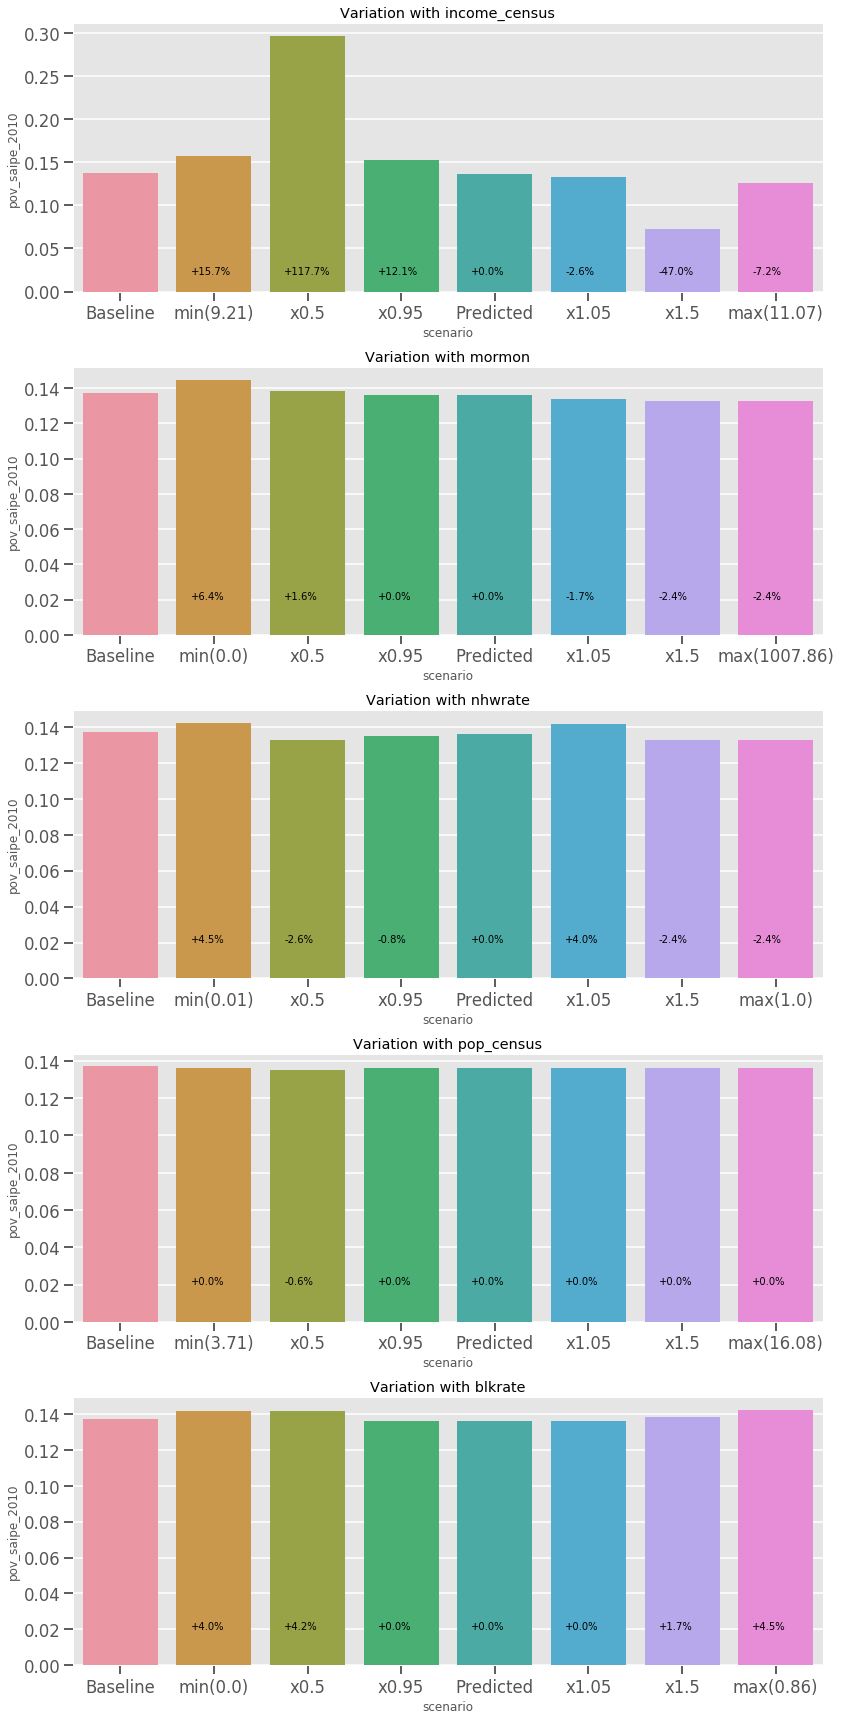

In [201]:
cols=['income_census','mormon','nhwrate','pop_census','blkrate']
sns.set_context("talk")
plt.figure(figsize=(12, 24))
plt.style.use("ggplot")
for pos,var in enumerate(cols):
    ax=plt.subplot(len(cols),1,pos+1)
    plot_variable_change('Salt Lake','Utah',var,ax=ax)
plt.tight_layout()

,Baseline,min(9.21),x0.5,x0.95,Predicted,x1.05,x1.5,max(11.07)
0,0.128,0.124491,0.215814,0.115998,0.115998,0.115998,0.115998,0.115998


,Baseline,min(0.0),x0.5,x0.95,Predicted,x1.05,x1.5,max(1007.86)
0,0.128,0.11947,0.118105,0.115998,0.115998,0.115322,0.112739,0.103935


,Baseline,min(0.01),x0.5,x0.95,Predicted,x1.05,x1.5,max(1.0)
0,0.128,0.127987,0.128514,0.115998,0.115998,0.115476,0.112038,0.098178


,Baseline,min(3.71),x0.5,x0.95,Predicted,x1.05,x1.5,max(16.08)
0,0.128,0.11206,0.111776,0.111776,0.115998,0.115998,0.118293,0.115998


,Baseline,min(0.0),x0.5,x0.95,Predicted,x1.05,x1.5,max(0.86)
0,0.128,0.121801,0.115476,0.115998,0.115998,0.115998,0.115998,0.133462


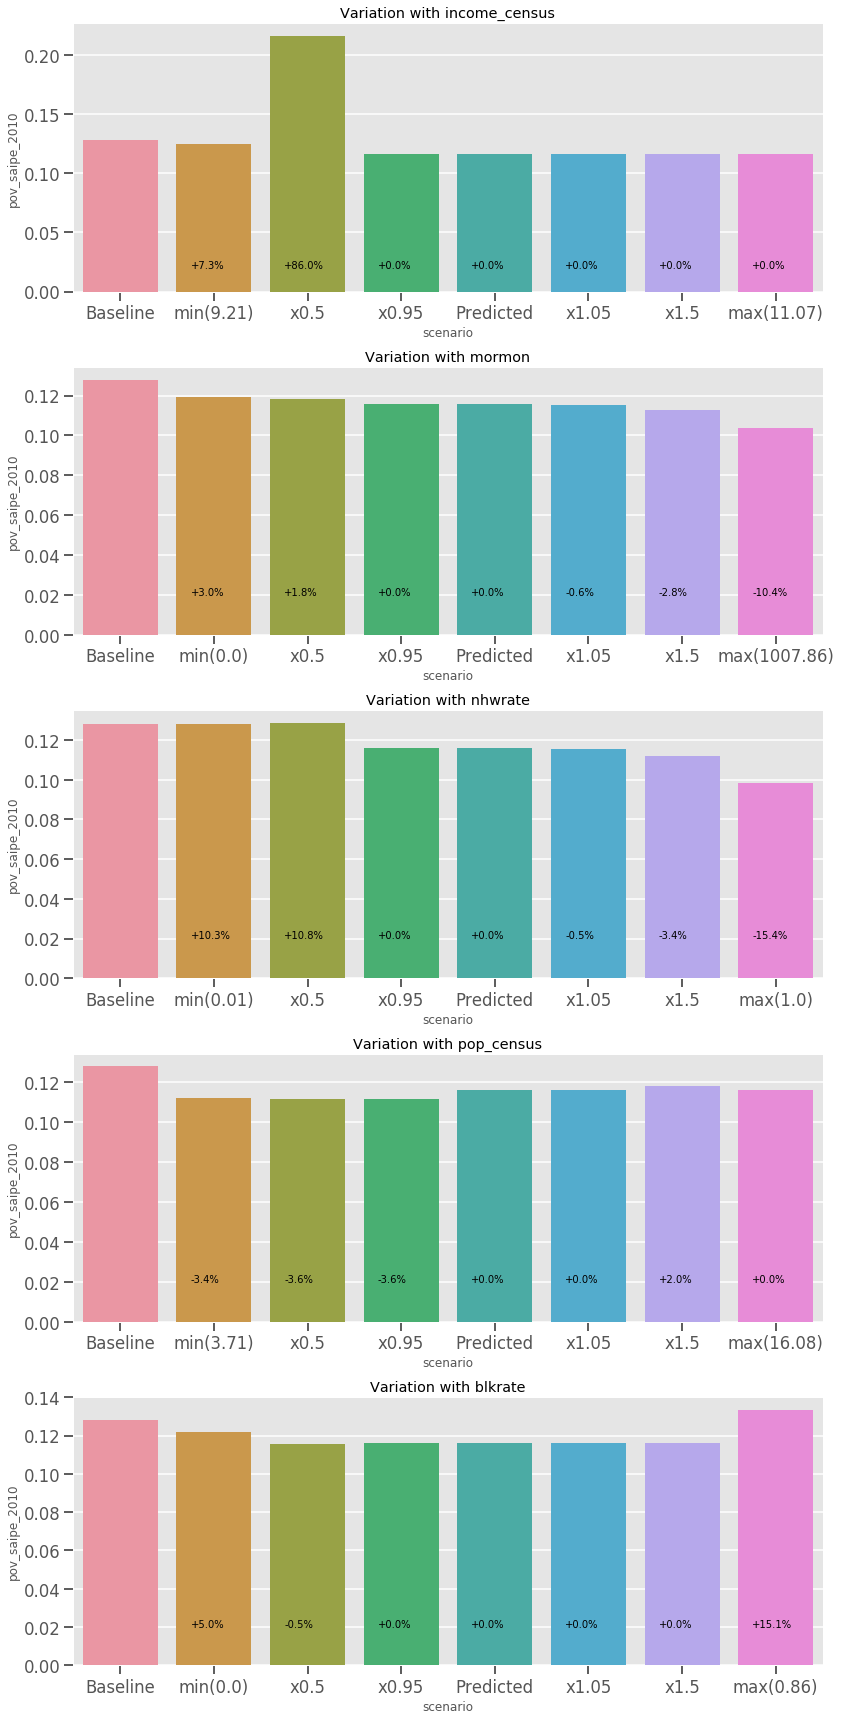

In [202]:
cols=['income_census','mormon','nhwrate','pop_census','blkrate']
sns.set_context("talk")
plt.figure(figsize=(12, 24))
plt.style.use("ggplot")
for pos,var in enumerate(cols):
    ax=plt.subplot(len(cols),1,pos+1)
    plot_variable_change('San Francisco','California',var,ax=ax)
plt.tight_layout()